In [11]:
#Importing required libraries
import pandas as pd
import numpy as np
import random as rnd

# Data Visualization
import seaborn as sns
import matplotlib.pyplot as plt

# Machine Learning
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC, SVC
from sklearn import tree
from sklearn.svm import SVC
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

In [12]:
# read the dat file
data = pd.read_csv('http://users.stat.ufl.edu/~winner/data/airq402.dat',header = None, delim_whitespace=True,
error_bad_lines=False )

In [13]:
data.head()

,0,1,2,3,4,5,6,7,8,9,10
0,CAK,ATL,114.47,528,424.56,FL,70.19,111.03,FL,70.19,111.03
1,CAK,MCO,122.47,860,276.84,FL,75.10,123.09,DL,17.23,118.94
2,ALB,ATL,214.42,852,215.76,DL,78.89,223.98,CO,2.77,167.12
3,ALB,BWI,69.40,288,606.84,WN,96.97,68.86,WN,96.97,68.86
4,ALB,ORD,158.13,723,313.04,UA,39.79,161.36,WN,15.34,145.42


In [14]:
columnslst=["City1","City2","Average Fare","Distance","Average weekly passengers","market leading airline",
"market share1","Average fare","Low price airline","market share2","price"]

In [15]:
df=data.copy(deep=True)

In [16]:
# Updating column names as per the data set description

df.columns=columnslst

In [17]:
#copying to the CSV file
df.to_csv(path_or_buf="airlinedata.csv",index=True)
df.head()

,City1,City2,Average Fare,Distance,Average weekly passengers,market leading airline,market share1,Average fare,Low price airline,market share2,price
0,CAK,ATL,114.47,528,424.56,FL,70.19,111.03,FL,70.19,111.03
1,CAK,MCO,122.47,860,276.84,FL,75.10,123.09,DL,17.23,118.94
2,ALB,ATL,214.42,852,215.76,DL,78.89,223.98,CO,2.77,167.12
3,ALB,BWI,69.40,288,606.84,WN,96.97,68.86,WN,96.97,68.86
4,ALB,ORD,158.13,723,313.04,UA,39.79,161.36,WN,15.34,145.42


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
City1                        1000 non-null object
City2                        1000 non-null object
Average Fare                 1000 non-null float64
Distance                     1000 non-null int64
Average weekly passengers    1000 non-null float64
market leading airline       1000 non-null object
market share1                1000 non-null float64
Average fare                 1000 non-null float64
Low price airline            1000 non-null object
market share2                1000 non-null float64
price                        1000 non-null float64
dtypes: float64(6), int64(1), object(4)
memory usage: 86.0+ KB


In [19]:
""" we can see a lot of columns above are object. They shpuld eb categorical. Hence, I would capture all convert them into categorical"""
char_cols = df.dtypes.pipe(lambda x: x[x == 'object']).index
#identifying the charecter / categorical columns

In [20]:
#got all categorical variables names in single list
print(char_cols)

Index(['City1', 'City2', 'market leading airline', 'Low price airline'], dtype='object')


In [21]:
# converting into categorical variables
for c in char_cols:
    df[c]= df[c].astype('category')

In [22]:
df['Average Fare']=df['Average Fare'].astype('int')

In [23]:
#data.isnull().any()
# checking missing values
df.isnull().sum()

City1                        0
City2                        0
Average Fare                 0
Distance                     0
Average weekly passengers    0
market leading airline       0
market share1                0
Average fare                 0
Low price airline            0
market share2                0
price                        0
dtype: int64

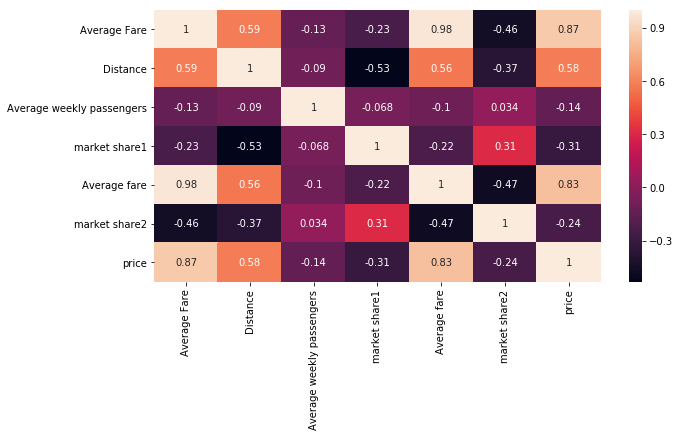

In [24]:
# Creating heat map for data visualization with correlation and coefficients
import seaborn as sns
f, ax = plt.subplots(figsize=(10, 5))
sns.heatmap(data=df.corr(), annot=True)

## Part-2

In [25]:
df1=df.copy(deep=True)

In [26]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
City1                        1000 non-null category
City2                        1000 non-null category
Average Fare                 1000 non-null int32
Distance                     1000 non-null int64
Average weekly passengers    1000 non-null float64
market leading airline       1000 non-null category
market share1                1000 non-null float64
Average fare                 1000 non-null float64
Low price airline            1000 non-null category
market share2                1000 non-null float64
price                        1000 non-null float64
dtypes: category(4), float64(5), int32(1), int64(1)
memory usage: 62.7 KB


In [27]:
#Treat “Average Fare” – 3rd Column as your Dependent Variable and Rest of the columns as Independent Variable.
y=df1.pop('Average Fare')
X=df1

In [28]:
X1=pd.DataFrame()
for i, col in enumerate(['Distance','Average weekly passengers','market share1','Average fare','market share2','price']):
    X1[col]=df1[col]

In [29]:
X2=pd.DataFrame()
for i, col in enumerate(['Distance','market share1','Average fare','price']):
    X2[col]=df1[col]

In [30]:
X3=pd.DataFrame()
for i, col in enumerate(['Distance','market share1','market share2','price']):
    X3[col]=df1[col]

In [31]:
X1.shape

(1000, 6)

In [32]:
X1.head()

,Distance,Average weekly passengers,market share1,Average fare,market share2,price
0,528,424.56,70.19,111.03,70.19,111.03
1,860,276.84,75.10,123.09,17.23,118.94
2,852,215.76,78.89,223.98,2.77,167.12
3,288,606.84,96.97,68.86,96.97,68.86
4,723,313.04,39.79,161.36,15.34,145.42


 ## Create Scatter Plot of Independent Variable vs Dependent Variable

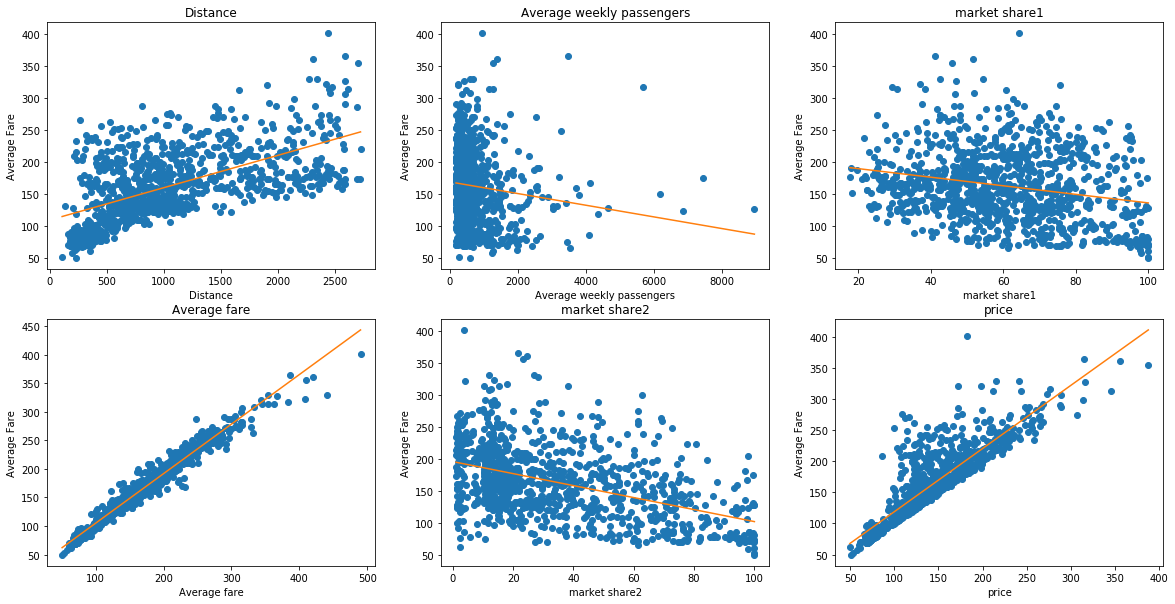

In [33]:
# Plotting the 'Distance','Average weekly passengers','market share1','Average fare','market share2','price' against 'Average Fare'
plt.figure(figsize=(20, 10))

# iterating for each column 'Distance','Average weekly passengers','market share1','Average fare','market share2','price'
for i, col in enumerate(['Distance','Average weekly passengers','market share1','Average fare','market share2','price']):
    plt.subplot(2, 3, i+1)
    x = X[col]
    plt.plot(x, y, 'o')
    # Create regression line
    plt.plot(np.unique(x), np.poly1d(np.polyfit(x, y, 1))(np.unique(x)))
    plt.title(col)
    plt.xlabel(col)
    plt.ylabel('Average Fare')

 ## Build Multiple Linear Regression model.

In [34]:
#Splitting the data into Dependent and independent variables
X1=pd.DataFrame()
for i, col in enumerate(['Distance','Average weekly passengers','market share1','Average fare','market share2','price']):
    X1[col]=df1[col]

In [35]:
X2=pd.DataFrame()
for i, col in enumerate(['Distance','market share1','price']):
    X2[col]=df1[col]

X3=pd.DataFrame()
for i, col in enumerate(['Distance','market share1','market share2','price']):
    X3[col]=df1[col]

In [36]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(X1, y)

# print intercept and coefficients
print(lm.intercept_)
print(lm.coef_)

10.315017653929573
[ 0.00216398 -0.00100061  0.06411164  0.70826319 -0.06558595  0.21874115]


In [37]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(X2, y)

# print intercept and coefficients
print(lm.intercept_)
print(lm.coef_)

-5.024110846431512
[0.01554334 0.30288333 0.93059151]


In [38]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(X3, y)

# print intercept and coefficients
print(lm.intercept_)
print(lm.coef_)

15.557213114620538
[ 0.00929572  0.425733   -0.56536016  0.91780805]


In [39]:
## 1.Find the most important features of this dataset to predict the average fair.
## Price and Average fare are the most important features
## 2.Figure out what other model can be applied to improve the model performance.

In [40]:
#Splitting the data into Dependent and independent variables
x=pd.DataFrame()
for i, col in enumerate(['Average fare','price']):
    x[col]=df1[col]

In [41]:
# Functions created for all the models to verify which on eis best
def classifyWithLogisticRegression ( trainingData, results, testData ):
    clf_logreg = LogisticRegression()
    clf_logreg.fit(trainingData, results)
    return clf_logreg.predict(testData)

def classifyWithDecisionTree ( trainingData, results, testData ):
    clf_tree = tree.DecisionTreeClassifier()
    clf_tree.fit(trainingData, results)
    return clf_tree.predict(testData)

def classifyWithSVM ( trainingData, results, testData ):
    clf_svm = SVC()
    clf_svm.fit(trainingData,results)
    return clf_svm.predict(testData)

def classifyWithPerceptron ( trainingData, results, testData ):
    clf_perceptron = Perceptron()
    clf_perceptron.fit(trainingData,results)
    return clf_perceptron.predict(testData)

def classifyWithKNeighbors ( trainingData, results, testData ):
    clf_KNN = KNeighborsClassifier()
    clf_KNN.fit(trainingData,results)
    return clf_KNN.predict(testData)

def classifyWithGaussianNaiveBayes ( trainingData, results, testData ):
    clf_GaussianNB = GaussianNB()
    clf_GaussianNB.fit(trainingData,results)
    return clf_GaussianNB.predict(testData)

def classifyWithStochasticGradientDescent ( trainingData, results, testData ):
    sgd = SGDClassifier()
    sgd.fit(trainingData, results)
    return sgd.predict(testData)

def classifyWithLinearSVC ( trainingData, results, testData ):
    linear_svc = LinearSVC()
    linear_svc.fit(trainingData, results)
    return linear_svc.predict(testData)

def classifyWithRandomForest ( trainingData, results, testData ):
    random_forest = RandomForestClassifier(n_estimators=100)
    random_forest.fit(trainingData, results)
    return random_forest.predict(testData)

In [42]:
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn import metrics

# Solitting the data into train and test
X_train,X_test,y_train,y_test = train_test_split(x,y,test_size = 0.3,random_state = 3)

## Get the accuracy score on train and test data.

In [43]:
LR_prediction = classifyWithLogisticRegression(X_train, y_train, X_test)
DT_prediction = classifyWithDecisionTree(X_train, y_train, X_test)
SVM_prediction = classifyWithSVM(X_train, y_train, X_test)
KN_prediction = classifyWithKNeighbors(X_train, y_train, X_test)
LRSVC_prediction = classifyWithLinearSVC(X_train, y_train, X_test)
RF_prediction = classifyWithRandomForest(X_train, y_train, X_test)
NB_prediction = classifyWithGaussianNaiveBayes ( X_train, y_train, X_test )
print("Logistic regressor accuracy is",metrics.accuracy_score(y_test,LR_prediction))
print("Decision Tree regressor accuracy is",metrics.accuracy_score(y_test,DT_prediction))
print("SVM regressor accuracy is",metrics.accuracy_score(y_test,SVM_prediction))
print("KNeighbors regressor accuracy is",metrics.accuracy_score(y_test,KN_prediction))
print("LinearSVC regressor accuracy is",metrics.accuracy_score(y_test,LRSVC_prediction))
print("RandomForest regressor accuracy is",metrics.accuracy_score(y_test,RF_prediction))
print("Naive Base accuracy is",metrics.accuracy_score(y_test,NB_prediction))

C:\Users\nn\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\nn\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\nn\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\nn\Anaconda3\lib\site-packages\sklearn\svm\base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


Logistic regressor accuracy is 0.023333333333333334
Decision Tree regressor accuracy is 0.05333333333333334
SVM regressor accuracy is 0.04666666666666667
KNeighbors regressor accuracy is 0.07666666666666666
LinearSVC regressor accuracy is 0.006666666666666667
RandomForest regressor accuracy is 0.056666666666666664
Naive Base accuracy is 0.08666666666666667



Part 4:
 Apply PCA and find out the optimum number of components

 Give a 3D plot of 3 PC’s

 Model the data with PCA and evaluate the change in accuracy

In [44]:
print(x)

     Average fare   price
0          111.03  111.03
1          123.09  118.94
2          223.98  167.12
3           68.86   68.86
4          161.36  145.42
5          137.97  127.69
6          148.59  148.59
7          205.06  174.00
8          127.69  127.69
9          132.91  124.78
10         226.79  200.93
11         180.49  161.39
12         174.62  163.22
13         117.20  117.20
14         181.34  149.41
15         152.03  152.03
16         113.82  113.82
17         130.44  130.44
18         182.27  109.14
19         233.26  222.08
20         164.27  144.51
21         151.81  151.81
22          70.99   70.99
23         167.46  155.82
24         136.70  119.03
25         164.81  159.64
26          73.50   73.50
27         213.13  213.13
28          71.51   71.51
29         119.76  118.05
..            ...     ...
970        111.80  105.36
971         97.48   97.48
972        268.78  268.78
973        165.01  160.60
974        169.59  169.59
975        191.34  191.34
976        1

In [47]:
print(y)

0      114
1      122
2      214
3       69
4      158
5      135
6      152
7      190
8      129
9      134
10     212
11     173
12     170
13     120
14     168
15     154
16     114
17     132
18     181
19     233
20     162
21     161
22      71
23     163
24     134
25     165
26      77
27     227
28      74
29     120
      ... 
970    110
971     98
972    263
973    165
974    177
975    215
976    122
977     82
978    148
979    177
980     74
981    330
982    134
983    116
984    237
985    401
986     77
987    105
988    144
989    322
990    156
991     70
992    162
993    131
994    288
995    136
996     83
997    159
998     73
999    126
Name: Average Fare, Length: 1000, dtype: int32


In [48]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn import datasets
from sklearn.decomposition import PCA

In [49]:
df=pd.concat([x,y],axis=1)
df.head()

,Average fare,price,Average Fare
0,111.03,111.03,114
1,123.09,118.94,122
2,223.98,167.12,214
3,68.86,68.86,69
4,161.36,145.42,158


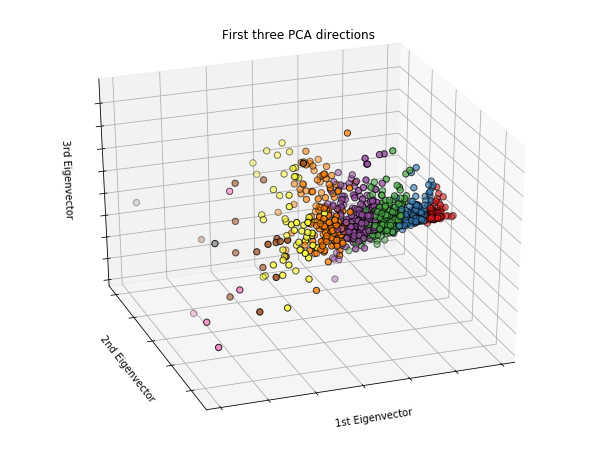

In [50]:
# For better understanding plot the first three PCA dimensions 
fig = plt.figure(1, figsize=(8, 6))
ax = Axes3D(fig, elev=-150, azim=110)
x_reduced = PCA(n_components=3).fit_transform(df)
ax.scatter(x_reduced[:, 0], x_reduced[:, 1], x_reduced[:, 2], c=y, cmap=plt.cm.Set1, edgecolor='k', s=40)
ax.set_title("First three PCA directions")
ax.set_xlabel("1st Eigenvector")
ax.w_xaxis.set_ticklabels([])
ax.set_ylabel("2nd Eigenvector")
ax.w_yaxis.set_ticklabels([])
ax.set_zlabel("3rd Eigenvector")
ax.w_zaxis.set_ticklabels([])
plt.show()